In [1]:
### Scikit-Learn: https://scikit-learn.org/stable/
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # for plotting 
import seaborn as sns # for plotting
from sklearn import datasets
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import model_selection as ms

In [2]:
#
# sklearn comes with a few datasets.. https://scikit-learn.org/stable/datasets/toy_dataset.html
cancer_data = datasets.load_breast_cancer()
y = cancer_data.target # Training labels ('malignant = 0', 'benign = 1')
X = cancer_data.data # 30 attributes; https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset
X = preprocessing.scale(X) # scale each data attribute to zero-mean and unit variance 

df = pd.DataFrame(X[:,0:2], columns=['Tumor Radius','Tumor Texture'])

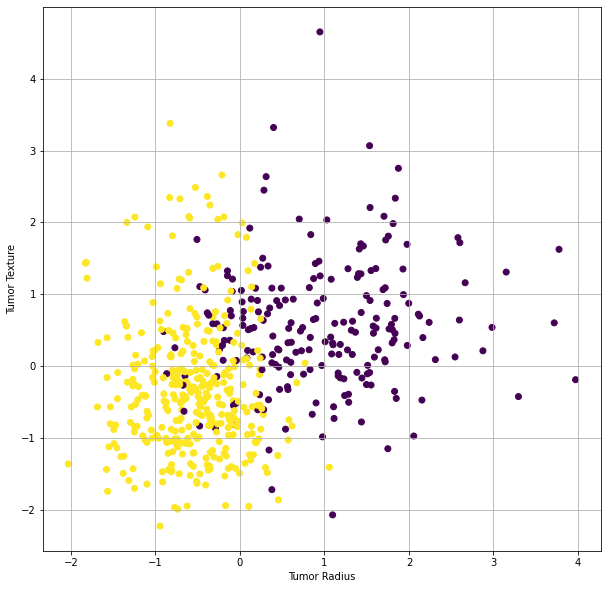

In [11]:
# Plot the first 2 attributes of training points
plt.figure(figsize=(10, 10))
plt.scatter(df['Tumor Radius'],df['Tumor Texture'], c=y)
plt.xlabel('Tumor Radius')
plt.ylabel('Tumor Texture')
plt.grid(True)
plt.show()

In [12]:
#
# We create:
# - an array with many different values of the hyperparameter alpha
# - an array of the same length where we record, for each alpha, the scoore we get when we fit a model with related alpha
alpha = np.arange(1e-15,1,0.005) # Range of hyperparameter values 1E-15 to 1 by 0.005
val_scores = np.zeros((len(alpha),1)) # Initialize validation score for each alpha value
#
# the library/function SGDClassifier implements regularized linear models with stochastic gradient descent
# we can specify a loss/cost function (we use hinge for SVM) and a regularization function (here give by penalty)
# note we could use L2 norm (i.e. geometric distance), L1 absolute norm or a combination of both
for i in range(len(alpha)): # for each alpha value
    # Set up SVM with hinge loss and l2 norm regularization
    model = linear_model.SGDClassifier(loss='hinge', penalty='l2', alpha=alpha[i])
    # Calculate cross validation scores for 5-fold cross-validation
    score = ms.cross_val_score(model, X, y, cv=5)
    val_scores[i] = score.mean() # Calculate mean of the 5 scores



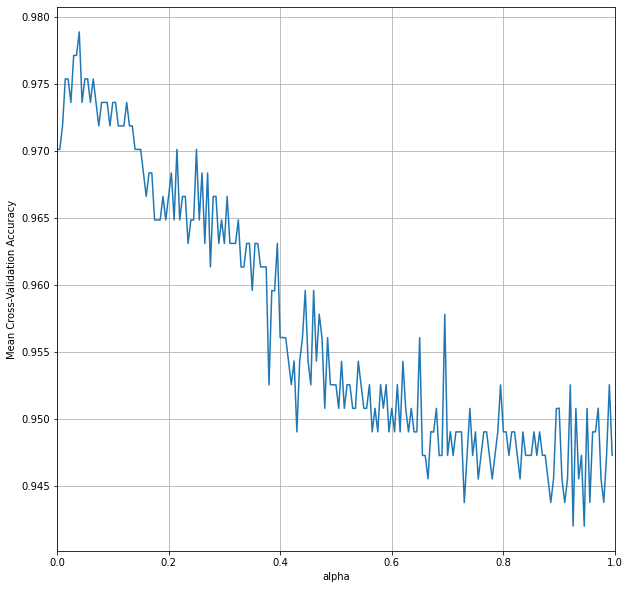

In [14]:
# Plot how cross-validation score changes with alpha
# Here we see that, as expected, the accuracy/score (i.e. inverse of objective function) grows first and then becomes smaller and smaller
plt.figure(figsize=(10, 10))
plt.plot(alpha,val_scores)
plt.xlim(0,1)
plt.xlabel('alpha')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.grid(True)
plt.show()


alpha_star = 0.040000000000001


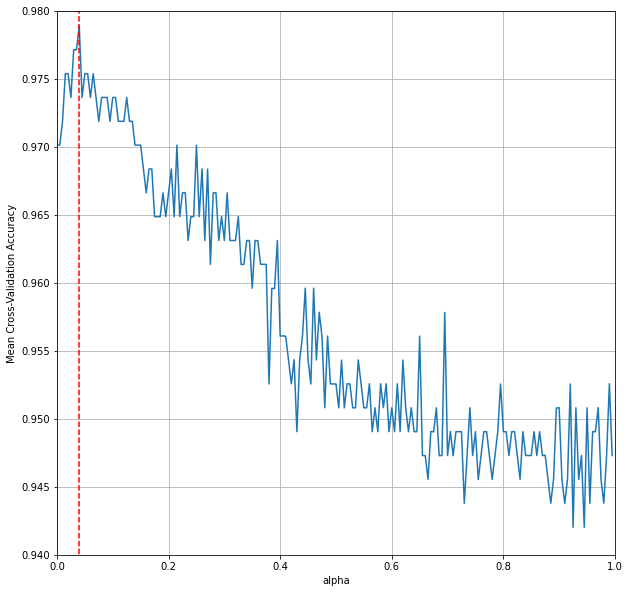

In [18]:
# Determine the alpha that maximizes the cross-validation score
ind = np.argmax(val_scores)
alpha_star = alpha[ind]
print('alpha_star =', alpha_star)

plt.figure(figsize=(10, 10))
plt.plot(alpha,val_scores)
#
# this plots a red dotted vertical line (X is fixed and y grows from 0 to 1.1)
plt.plot(np.ones(11)*alpha_star,
         np.arange(0,1.1,0.1),'--r')
plt.xlim(0,1)
plt.ylim(0.94,0.98)
plt.xlabel('alpha')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.grid(True)
plt.show()

In [23]:
# Train model with alpha_star
model_star = linear_model.SGDClassifier(loss='hinge', penalty='l2', alpha=alpha_star)
model_trained = model_star.fit(X,y)
print('Training Accuracy =', model_trained.score(X,y))
# Training Accuracy = 0.9806678383128296


Training Accuracy = 0.984182776801406


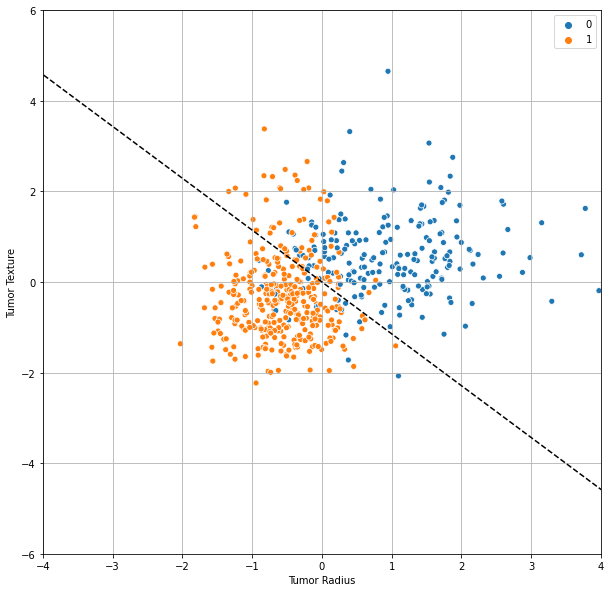

In [26]:
# Plot decision boundary of trained model
slope = model_trained.coef_[0,1]/-model_trained.coef_[0,0]
x1 = np.arange(-10,10,0.5)
y1 = slope*x1
plt.figure(figsize=(10, 10))
sns.scatterplot(X[:, 0], X[:, 1], hue=y)
plt.plot(x1,y1,'--k')
plt.xlim(-4,4)
plt.ylim(-6,6)
plt.xlabel('Tumor Radius')
plt.ylabel('Tumor Texture')
plt.grid(True)
plt.show()

In [22]:
dir(model_trained)

['C',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_allocate_parameter_mem',
 '_check_n_features',
 '_check_proba',
 '_estimator_type',
 '_expanded_class_weight',
 '_fit',
 '_fit_binary',
 '_fit_multiclass',
 '_get_learning_rate_type',
 '_get_loss_function',
 '_get_param_names',
 '_get_penalty_type',
 '_get_tags',
 '_make_validation_score_cb',
 '_make_validation_split',
 '_more_tags',
 '_partial_fit',
 '_predict_log_proba',
 '_predict_proba',
 '_predict_proba_lr',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 '_validate_params',
 'alpha',
 'average',
 'average_c